In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patheffects as path_effects
import seaborn as sns

# Data Visualization

### Load the data

In [25]:
df = pd.read_csv('dataset/spotify_songs_restructured_cleaned.csv', sep=',')
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_genre,danceability,energy,key,loudness,speechiness,liveness,valence,tempo,duration_ms,popularity_category,tempo_category,loudness_category,release_month
0,All the Time - Don Diablo Remix,Zara Larsson,70.0,All the Time (Don Diablo Remix),2019-07-05,pop,0.675,0.931000,1.000000,-3.43200,0.0742,0.1100,0.613000,120.950507,176616.0,Medium Popularity,Fast,Loud,July
1,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.0,Call You Mine - The Remixes,2019-07-19,pop,0.718,0.930000,5.360103,-3.77800,0.1020,0.2040,0.277000,121.956000,169093.0,Medium Popularity,Fast,Loud,July
2,Someone You Loved - Future Humans Remix,Lewis Capaldi,69.0,Someone You Loved (Future Humans Remix),2019-03-05,pop,0.650,0.833000,1.000000,-4.67200,0.0359,0.0833,0.511055,123.976000,189052.0,Medium Popularity,Fast,Loud,March
3,Tough Love - Tiësto Remix / Radio Edit,Avicii,68.0,Tough Love (Tiësto Remix),2019-06-14,pop,0.594,0.935000,8.000000,-6.71677,0.0565,0.6370,0.366000,127.015000,193187.0,Medium Popularity,Fast,Moderate,June
4,If I Can't Have You - Gryffin Remix,Shawn Mendes,67.0,If I Can't Have You (Gryffin Remix),2019-06-20,pop,0.642,0.818000,2.000000,-4.55200,0.0320,0.0919,0.590000,124.957000,253040.0,Medium Popularity,Fast,Loud,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,Wasted,Tiësto,47.0,Wasted,2014-04-22,edm,0.645,0.832000,2.000000,-5.59500,0.0294,0.1990,0.511055,112.028000,188371.0,Medium-Low Popularity,Moderate,Moderate,April
21138,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,27.0,Many Ways,2013,edm,0.581,0.699208,5.000000,-8.36700,0.0365,0.5720,0.288000,128.001000,196993.0,Low Popularity,Fast,Moderate,NaN
21139,City Of Lights - Official Radio Edit,Lush & Simon,42.0,City Of Lights (Vocal Mix),2014-04-28,edm,0.428,0.922000,2.000000,-1.81400,0.0936,0.0668,0.511055,128.170000,204375.0,Medium-Low Popularity,Fast,Loud,April
21140,Only For You - Maor Levi Remix,Mat Zo,15.0,Only For You (Remixes),2014-01-01,edm,0.626,0.888000,2.000000,-3.36100,0.1090,0.3430,0.308000,128.008000,367432.0,Low Popularity,Fast,Loud,January


### Popularity Distribution over genres

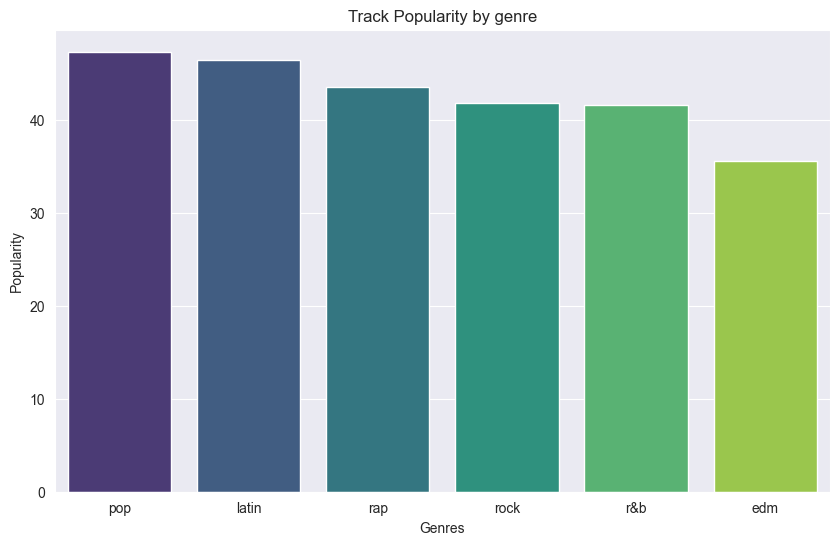

In [26]:
data = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=False)

plt.title('Track Popularity by genre')
plt.xlabel('Genres')
plt.ylabel('Popularity')

plt.show()

### Popularity Distribution over months

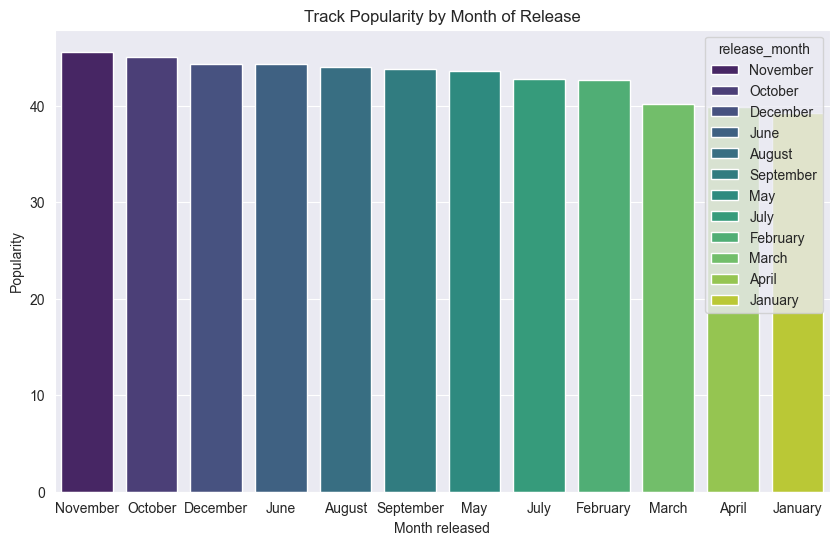

In [27]:
data = df.groupby('release_month')['track_popularity'].mean().sort_values(ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=data.index, y=data.values, hue=data.index, palette='viridis', legend=True
            )

plt.title('Track Popularity by Month of Release')
plt.xlabel('Month released')
plt.ylabel('Popularity')

plt.show()

### Total Tracks per Genre

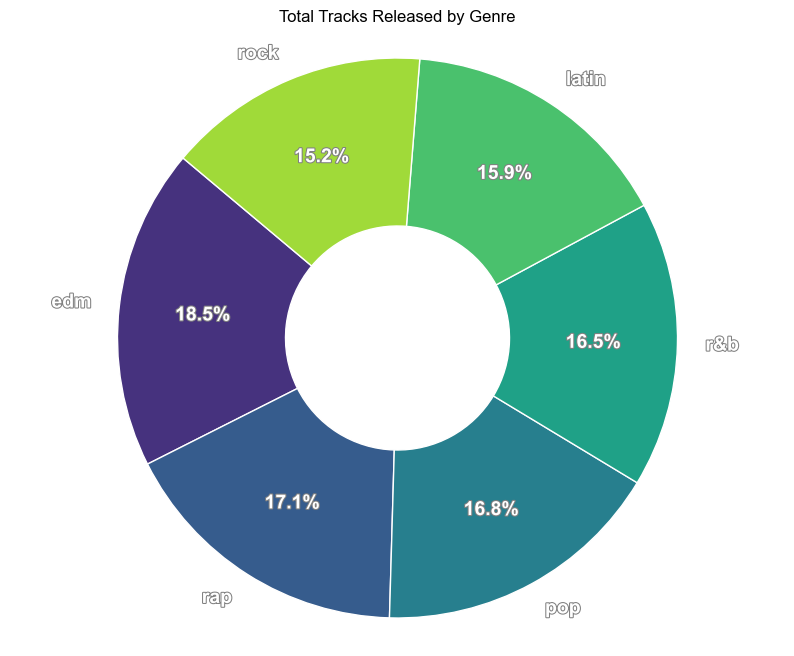

In [28]:
genre_counts = df['playlist_genre'].value_counts()

def add_outline(text, linewidth=1.5, foreground='grey'):
    text.set_path_effects([path_effects.Stroke(linewidth=linewidth, foreground=foreground), path_effects.Normal()])

# Plot the donut chart
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140,
                                  colors=sns.color_palette('viridis', len(genre_counts)),
                                  textprops={'color': 'white', 'weight': 'bold', 'fontsize': 14},
                                  wedgeprops={'width': 0.6}, pctdistance=0.7)

# Add outline to the text
for text in texts + autotexts:
    add_outline(text)

plt.title('Total Tracks Released by Genre', color='black')
plt.axis('equal')
plt.show()

### Tempo Distribution by Year

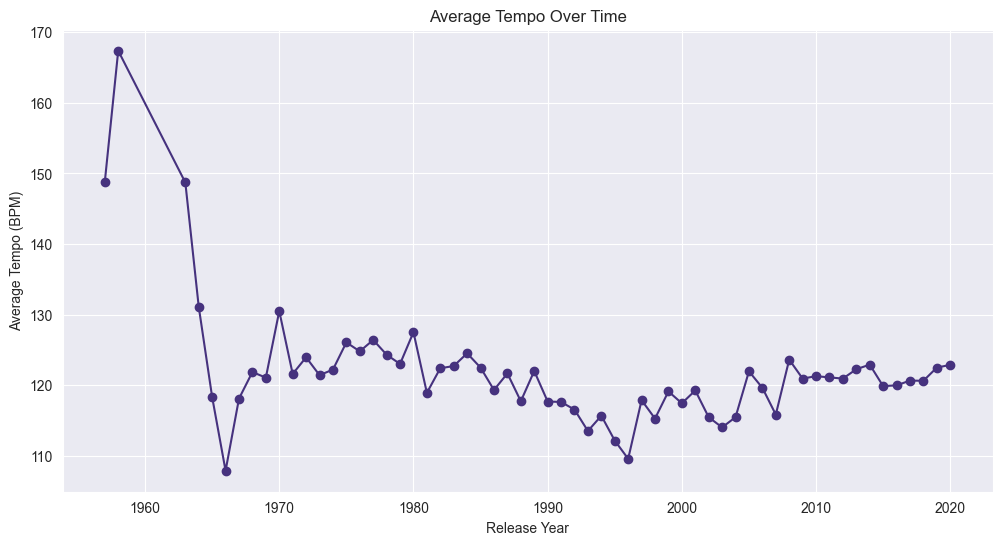

In [29]:
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce', format='%Y-%m-%d')

colors=sns.color_palette('viridis', len(genre_counts))

tempo_over_time = df.groupby(df['track_album_release_date'].dt.year)['tempo'].mean()

plt.figure(figsize=(12, 6))
tempo_over_time.plot(kind='line', marker='o', color=colors)
plt.title('Average Tempo Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Tempo (BPM)')
plt.show()

### Popularity Categories Distribution 

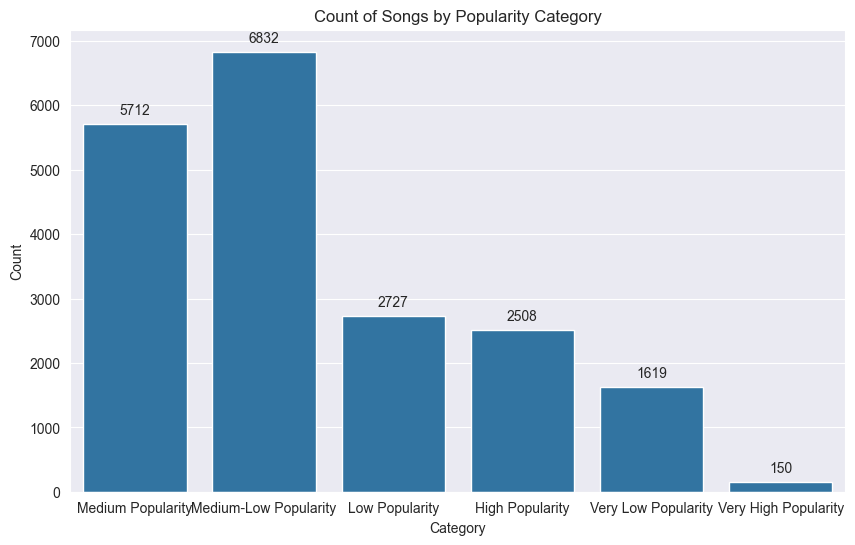

In [30]:
category_counts = df['popularity_category'].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='popularity_category')
plt.title('Count of Songs by Popularity Category')
plt.xlabel('Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Tempo Categories Distribution

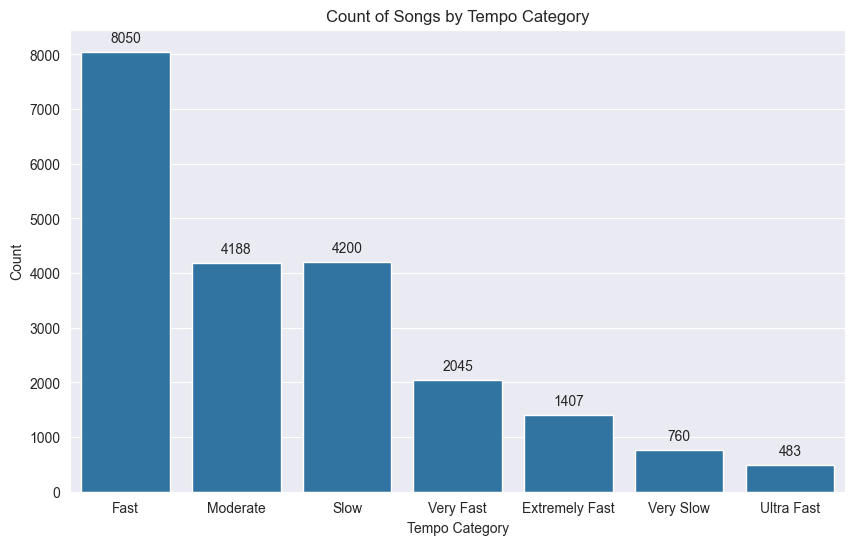

In [31]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='tempo_category')
plt.title('Count of Songs by Tempo Category')
plt.xlabel('Tempo Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### Loudness Categories Distribution

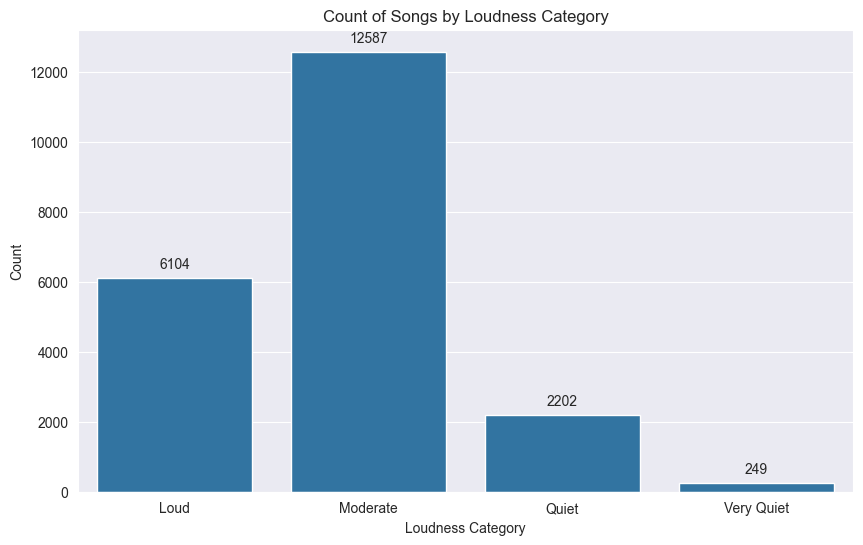

In [32]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='loudness_category')
plt.title('Count of Songs by Loudness Category')
plt.xlabel('Loudness Category')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()